In [1]:
# Would require your authethication key. We could remove colab-specific portion for our actual submission.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pip install matplotlib==3.4.2

In [3]:
import pandas as pd
import numpy as np
from numpy import median
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [4]:
#had to change mansi's initial directory; might be easier this way; can change back if problematic
data = pd.read_csv('/content/drive/My Drive/5106_FBA_Team_Proj/Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# convert all objects into .astype("category")

Summary:

*   Dataset Structure: 1470 observations (rows), 35 features (variables)
*   Missing Data: no missing data! this will make it easier to work with the dataset.
*   Data Type: We only have two datatypes in this dataset: categorical and integers
*   Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!
*   Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

In [7]:
'''Setting default layouts for all plots'''
# setting a default figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# setting a default style
sns.set_style('darkgrid')

# setting tight layout
plt.figure(tight_layout=True)

# setting a default font sixe for labels
sns.set_context("paper", font_scale=1.5)

<Figure size 864x576 with 0 Axes>

<h2> The Impact of Income towards Attrition </h2>
I wonder how much importance does each employee give to the income they earn in the organization. Here we will find out if it is true that money is really everything!<br>

<h3> Questions to Ask Ourselves </h3>
<ul>
    <li>What is the average monthly income by <b>department</b>? Are there any significant differences between individuals who quit and didn't quit? </li>
    <li>Are there significant changes in the <b>level of income by Job Satisfaction</b>? Are individuals with a <b>lower satisfaction</b> getting much less income than the ones who are more satisfied? </li>
    <li>Do employees who <b>quit the organization</b> have a much lower income than people who <b>didn't quit the organization</b>? </li>
    <li>Do employees with a higher performance rating earn more than with a lower performance rating? Is the difference significant by Attrition status? </li>
</ul><br>


<h3>Summary: </h3>
<ul>
    <li><b>Income by Departments: </b> Wow! We can see huge differences in each department by <b>attrition status. People with lower salaries had more attrition rate than the one’s being paid well.</b> </li>
    <li><b>Income by Job Satisfaction: </b> Hmm. It seems the lower the job satisfaction the<b> wider the gap</b> by attrition status in the levels of income. </li>
    <li><b>Attrition sample population: </b> I would say that most of this sample population has had a <b>salary increase</b> of less than 15% and a <b>monthly income</b> of less than 7,000 </li>
    <li><b>Exhaustion at Work: </b>  Over 54% of workers who left the organization worked<b> overtime</b>! Will this be a reason why employees are leaving?</li>
    <li><b>Differences in the DailyRate: </b><b>HealthCare Representatives </b>, <b>Sales Representatives </b>, and <b>Research Scientists </b> have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income. </li>
</ul>

### **Average Income by Department:**

#### **Q1.** What is the average monthly income by department? Are there any significant differences between individuals who quit and didn't quit?

**Income by Departments:** Wow! We can see huge differences in each department by attrition status. **People with lower salaries had more attrition rate than the one’s being paid well.**

Text(0, 0.5, 'Average Income')

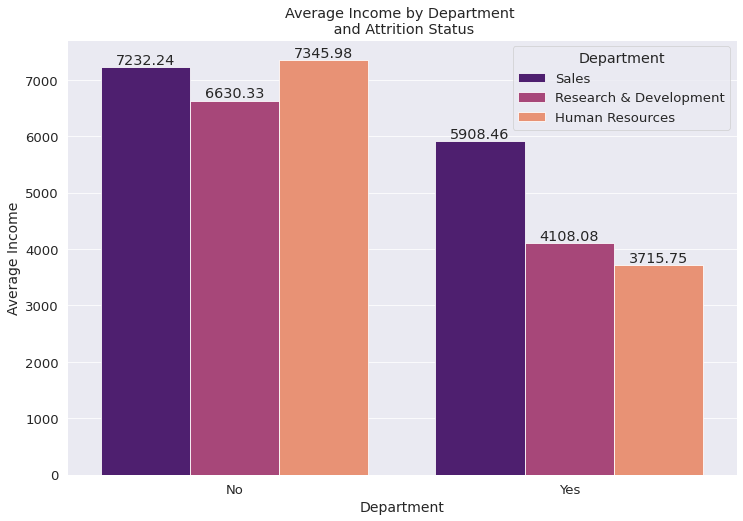

In [8]:
# Plot Option 1
plt.title('Average Income by Department \n and Attrition Status')
plots = sns.barplot(x="Attrition", y="MonthlyIncome", hue="Department", order = ['No','Yes'],data=data, palette = 'magma', ci=None)
for container in plots.containers:
  plt.bar_label(container)
plt.xlabel("Department", size=14)
plt.ylabel("Average Income", size=14)

Text(0, 0.5, 'Average Income')

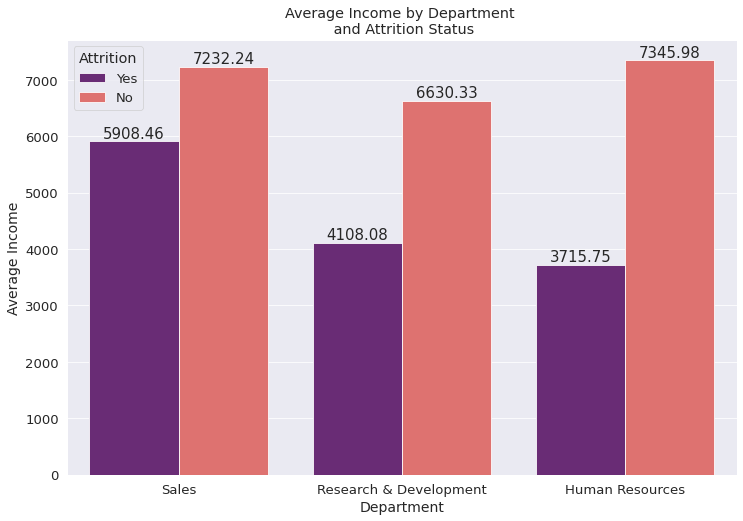

In [9]:
# Average Income by Department \n and Attrition Status
# Plot Option 2
plt.title('Average Income by Department \n and Attrition Status')
plots = sns.barplot(x="Department", y="MonthlyIncome", hue="Attrition", data=data, palette = 'magma',ci=None)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Department", size=14)
plt.ylabel("Average Income", size=14)

###**Determining Satisfaction by Income:**

#### **Q2** Are there significant changes in the level of income by Job Satisfaction? Are individuals with a lower satisfaction getting much less income than the ones who are more satisfied?


- **Income by Job Satisfaction**:It seems the lower the job satisfaction the wider the gap by attrition status in the levels of income.

Text(0, 0.5, 'Median Income')

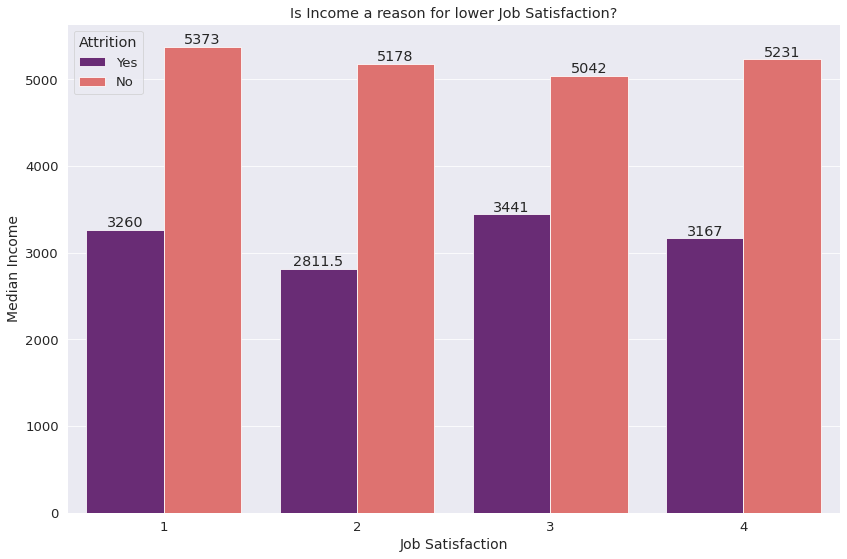

In [10]:
# Plot Option 1: Q2: Is Income a reason for lower Job Satisfaction?
sns.set_style('darkgrid')
plt.figure(figsize = (12, 8), tight_layout=True)
plt.title('Is Income a reason for lower Job Satisfaction?')
plots = sns.barplot(y="MonthlyIncome", x="JobSatisfaction", hue="Attrition", data=data, palette = 'magma',  estimator=median, ci=None)
for container in plots.containers:
  plt.bar_label(container)
plt.xlabel("Job Satisfaction", size=14)
plt.ylabel("Median Income", size=14)

Text(0, 0.5, 'Median Income')

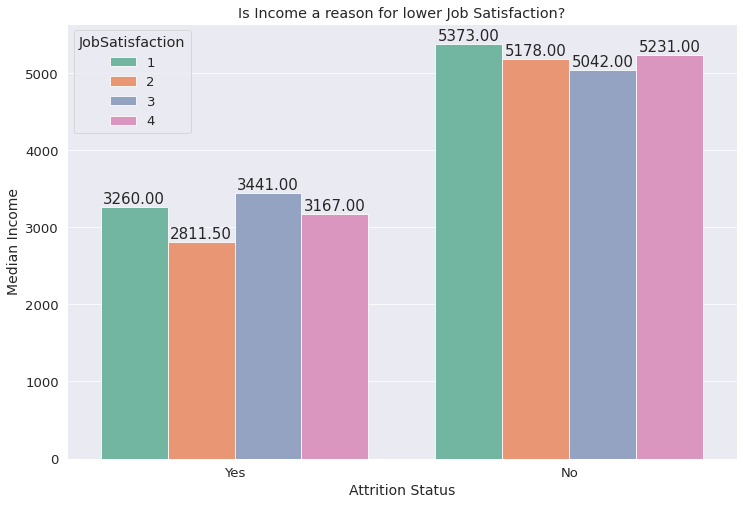

In [11]:
# Plot Option 2: Q2: Is Income a reason for lower Job Satisfaction?
plt.title('Is Income a reason for lower Job Satisfaction?')
plots = sns.barplot(x="Attrition", y="MonthlyIncome", hue="JobSatisfaction", data=data, estimator=median, palette = 'Set2', ci=None) 
# for container in plots.containers:
#   plt.bar_label(container)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Attrition Status", size=14)
plt.ylabel("Median Income", size=14)

###**Average and Percent Difference of Daily Rates:**

#### **Q3.** Do employees who quit the organization have a much lower income than people who didn't quit the organization?

**Differences in the DailyRate: HealthCare Representatives , Sales Representatives , and Research Scientists** have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income.

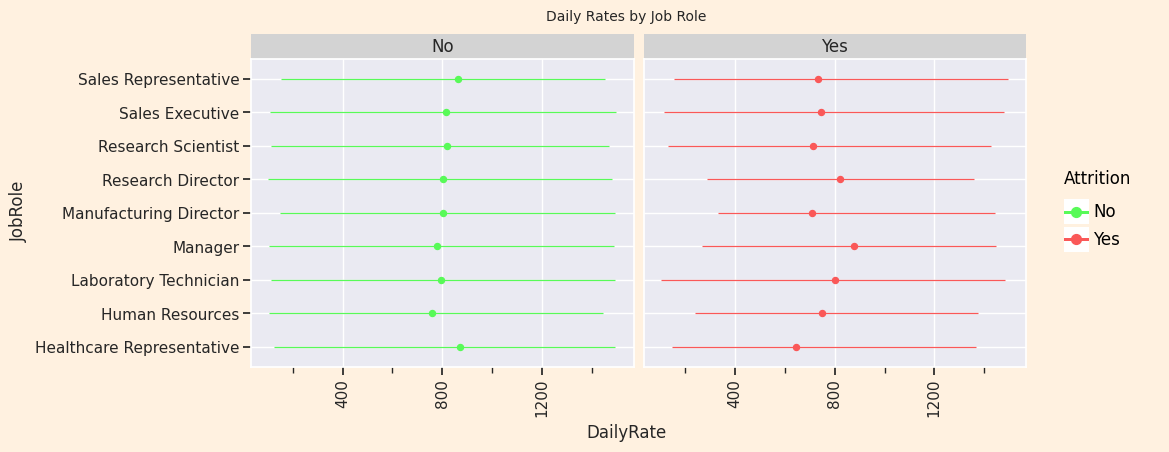

<ggplot: (8788008536829)>

In [17]:
daily_r = data[['JobRole', 'Attrition', 'DailyRate']]
gp = ggplot(daily_r, aes(
    x='JobRole', y='DailyRate', color='Attrition')) + facet_wrap(['Attrition']) + coord_flip() + theme_seaborn() + theme(
        axis_text_x = element_text(angle=90), plot_title=element_text(hjust=0.5, size=10), plot_background=element_rect(fill='#FFF1E0'), figure_size=(10, 4)) + stat_summary(
            fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + scale_color_manual(values=["#58FA58", "#FA5858"]) + labs(title="Daily Rates by Job Role")
gp

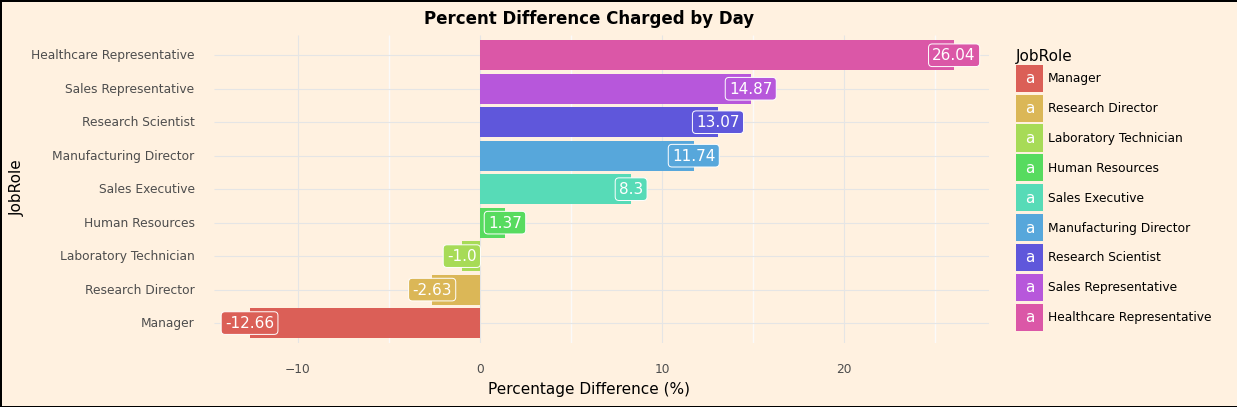

<ggplot: (8788008541421)>

In [16]:
# What's the difference between Dailyrates by attrition and jobrole status.
attrition_daily = data[data['Attrition'] == 'Yes'][['JobRole', 'Attrition', 'DailyRate']].groupby(['JobRole'])
avg_attrition = attrition_daily.mean().reset_index()
no_attrition_daily = data[data['Attrition'] == 'No'][['JobRole', 'Attrition', 'DailyRate']].groupby(['JobRole'])
avg_noattrition = no_attrition_daily.mean().reset_index()
combined_df = pd.merge(avg_attrition, avg_noattrition, on='JobRole')
combined_df['pct_diff'] = round(((avg_noattrition['DailyRate'] - avg_attrition['DailyRate'])*100 / avg_noattrition['DailyRate']),2)
combined_df.sort_values('pct_diff', inplace=True)
combined_df['JobRole'] = pd.Categorical(combined_df.JobRole, categories=pd.unique(combined_df.JobRole))
pct_Diff = combined_df['pct_diff'].tolist()

ggplot(combined_df, aes(x='JobRole', y='pct_diff', fill ='JobRole')) + geom_bar(
    stat='identity') + coord_flip() + theme_minimal() + xlab("JobRole") + ylab('Percentage Difference (%)') + ggtitle("Percent Difference Charged by Day") + theme(
        plot_title=element_text(face='bold', hjust=0.5, size=12), plot_background=element_rect(fill='#FFF1E0'), figure_size=(10, 4)) + geom_label(
                aes(label='pct_diff'), color = 'white')